In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings

np.random.seed(12)
random.seed(12)


pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## Data Loading and Exploration

In [9]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
submission_df = pd.read_csv("../data/sample_submission.csv")

In [12]:
train_df.head(20)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [17]:
train_df.shape

(1200000, 21)

In [14]:
test_df.head(20)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
5,1200005,43.0,Male,52370.0,Married,2.0,Bachelor's,NaN,5.386224,Suburban,Basic,NaN,15.0,432.0,2.0,2022-07-08 15:21:39.223901,NaN,No,Rarely,Condo
6,1200006,21.0,Female,5896.0,Married,3.0,Master's,NaN,14.773963,Rural,Comprehensive,1.0,14.0,321.0,8.0,2023-11-12 15:21:39.288099,Good,No,Monthly,Condo
7,1200007,44.0,Male,31855.0,Divorced,3.0,Bachelor's,NaN,20.847900,Suburban,Premium,NaN,8.0,712.0,1.0,2021-03-12 15:21:39.149731,Poor,Yes,Monthly,Apartment
8,1200008,32.0,Female,76463.0,Divorced,4.0,PhD,NaN,22.988787,Suburban,Basic,0.0,1.0,540.0,2.0,2021-07-08 15:21:39.169102,Average,No,Weekly,Apartment
9,1200009,48.0,Female,27982.0,Married,2.0,High School,NaN,43.567433,Urban,Premium,1.0,15.0,757.0,7.0,2021-02-15 15:21:39.134960,Good,Yes,Daily,House


In [18]:
test_df.shape

(800000, 20)

In [15]:
submission_df.head(20)

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545
5,1200005,1102.545
6,1200006,1102.545
7,1200007,1102.545
8,1200008,1102.545
9,1200009,1102.545


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

## Data Cleaning and Preprocessing

In [16]:
train_df.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [19]:
test_df.isna().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [22]:
# Combining both together
train_df_1 = train_df.drop("Premium Amount", axis=1)

In [25]:
data = pd.concat([train_df_1, test_df], axis=0)

In [26]:
data.shape

(2000000, 20)

In [28]:
data.head(20)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo


In [29]:
data.isna().sum()

id                           0
Age                      31194
Gender                       0
Annual Income            74809
Marital Status           30865
Number of Dependents    182802
Education Level              0
Occupation              597200
Health Score            123525
Location                     0
Policy Type                  0
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
Policy Start Date            0
Customer Feedback       130100
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [30]:
data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,2.000000e+06,1.968806e+06,1.925191e+06,1.817198e+06,1.876475e+06,1.393169e+06,1.999991e+06,1.770667e+06,1.999997e+06
mean,9.999995e+05,4.114191e+01,3.276868e+04,2.009695e+00,2.561356e+01,1.003562e+00,9.570690e+00,5.929165e+02,5.018511e+00
std,5.773504e+05,1.353910e+01,3.218814e+04,1.416499e+00,1.220483e+01,9.828256e-01,5.774592e+00,1.500357e+02,2.594102e+00
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,1.646561e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00
25%,4.999998e+05,3.000000e+01,8.021000e+03,1.000000e+00,1.591866e+01,0.000000e+00,5.000000e+00,4.680000e+02,3.000000e+00
50%,9.999995e+05,4.100000e+01,2.395700e+04,2.000000e+00,2.457958e+01,1.000000e+00,1.000000e+01,5.950000e+02,5.000000e+00
75%,1.499999e+06,5.300000e+01,4.464100e+04,3.000000e+00,3.452391e+01,2.000000e+00,1.500000e+01,7.210000e+02,7.000000e+00
max,1.999999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000e+00,1.900000e+01,8.490000e+02,9.000000e+00


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Age                   float64
 2   Gender                object 
 3   Annual Income         float64
 4   Marital Status        object 
 5   Number of Dependents  float64
 6   Education Level       object 
 7   Occupation            object 
 8   Health Score          float64
 9   Location              object 
 10  Policy Type           object 
 11  Previous Claims       float64
 12  Vehicle Age           float64
 13  Credit Score          float64
 14  Insurance Duration    float64
 15  Policy Start Date     object 
 16  Customer Feedback     object 
 17  Smoking Status        object 
 18  Exercise Frequency    object 
 19  Property Type         object 
dtypes: float64(8), int64(1), object(11)
memory usage: 320.4+ MB


In [36]:
# Policy Start Date should be in datetme format
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'], errors='coerce')

In [37]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [38]:
# Separating the data types so we can handling missing values separately
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
datetime_columns = data.select_dtypes(include=['datetime']).columns.tolist()

In [39]:
numeric_columns

['id',
 'Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [40]:
categorical_columns

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [41]:
datetime_columns

['Policy Start Date']

In [42]:
# separating the daata
num_data = data[numeric_columns]
cat_data = data[categorical_columns]
date_data = data[datetime_columns]

### Handling the Numerical data

In [44]:
num_data.head(10)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0
5,5,29.0,45963.0,1.0,33.053198,2.0,4.0,614.0,5.0
6,6,41.0,40336.0,0.0,NaN,2.0,8.0,807.0,6.0
7,7,48.0,127237.0,2.0,5.769783,1.0,11.0,398.0,5.0
8,8,21.0,1733.0,3.0,17.869551,1.0,10.0,685.0,8.0
9,9,44.0,52447.0,2.0,20.473718,1.0,9.0,635.0,3.0


In [45]:
num_data.isna().sum()

id                           0
Age                      31194
Annual Income            74809
Number of Dependents    182802
Health Score            123525
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
dtype: int64

In [47]:
num_data.nunique()

id                      2000000
Age                          47
Annual Income             97540
Number of Dependents          5
Health Score             811360
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
dtype: int64

In [48]:
num_data['Previous Claims'].value_counts()

Previous Claims
0.0    508239
1.0    501692
2.0    279761
3.0     81764
4.0     17689
5.0      3411
6.0       506
7.0        86
8.0        12
9.0         9
Name: count, dtype: int64

In [49]:
num_data['Vehicle Age'].value_counts()

Vehicle Age
17.0    103983
11.0    103039
0.0     102232
18.0    102134
10.0    101852
14.0    101642
15.0    101222
19.0    100979
12.0    100863
16.0    100642
9.0      99921
2.0      99865
5.0      99266
7.0      99200
3.0      98619
13.0     98067
8.0      97307
4.0      97111
6.0      96650
1.0      95397
Name: count, dtype: int64

In [50]:
num_data.isna().sum()

id                           0
Age                      31194
Annual Income            74809
Number of Dependents    182802
Health Score            123525
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
dtype: int64

In [46]:
num_data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,2.000000e+06,1.968806e+06,1.925191e+06,1.817198e+06,1.876475e+06,1.393169e+06,1.999991e+06,1.770667e+06,1.999997e+06
mean,9.999995e+05,4.114191e+01,3.276868e+04,2.009695e+00,2.561356e+01,1.003562e+00,9.570690e+00,5.929165e+02,5.018511e+00
std,5.773504e+05,1.353910e+01,3.218814e+04,1.416499e+00,1.220483e+01,9.828256e-01,5.774592e+00,1.500357e+02,2.594102e+00
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,1.646561e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00
25%,4.999998e+05,3.000000e+01,8.021000e+03,1.000000e+00,1.591866e+01,0.000000e+00,5.000000e+00,4.680000e+02,3.000000e+00
50%,9.999995e+05,4.100000e+01,2.395700e+04,2.000000e+00,2.457958e+01,1.000000e+00,1.000000e+01,5.950000e+02,5.000000e+00
75%,1.499999e+06,5.300000e+01,4.464100e+04,3.000000e+00,3.452391e+01,2.000000e+00,1.500000e+01,7.210000e+02,7.000000e+00
max,1.999999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000e+00,1.900000e+01,8.490000e+02,9.000000e+00


- Missing values in Age is minimal, so it can be replaced with the median age. Median because we want to make sure we have adults or middle age in the insurance plan, not minimum that signifies teen (age)

- Annual income isn't too much too, we will replace with median, assuming more people are earning well too. 

- Number of dependents will be replaced with 0 the minimum because we assume if it's not given, then maybe it's not known. 

- Health score can be mixed i'll say, same values can make the data biased too, so interpolation seems okay here.. 

- Previous Claims -- Looking at the value counts, I think it's safe to fill randomly with numbers between 0 to 3. this is a better judgement of things. 

- Vehicle age is missing 9 values, so let's just fill witht he median, seems cool that way. 

- Credit score: This is very sensitive, we will fill with minimum, this is still applicable in a good way. 

In [57]:
def num_data_nan_cleaner(data):
    """
    Cleans the given dataset by filling missing values according to specific rules:
    - 'Age' is filled with the median.
    - 'Annual Income' is filled with the median.
    - 'Number of Dependents' is filled with 0 (assuming unknown implies none).
    - 'Health Score' is filled using linear interpolation.
    - 'Previous Claims' is filled randomly with values between 0 and 3.
    - 'Vehicle Age' is filled with the median.
    - 'Credit Score' is filled with the minimum value of the column.

    Args:
        data (pd.DataFrame): The dataset to clean.

    Returns:
        pd.DataFrame: The cleaned dataset with missing values filled.
    """
    
    np.random.seed(12)
    
    # Fill 'Age' with median
    if 'Age' in data.columns:
        data['Age'] = data['Age'].fillna(data['Age'].median())

    # Fill 'Annual Income' with median
    if 'Annual Income' in data.columns:
        data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].median())

    # Fill 'Number of Dependents' with 0
    if 'Number of Dependents' in data.columns:
        data['Number of Dependents'] = data['Number of Dependents'].fillna(0)

    # Fill 'Health Score' with linear interpolation
    if 'Health Score' in data.columns:
        data['Health Score'] = data['Health Score'].interpolate(method='linear', limit_direction='forward')

    # Fill 'Previous Claims' with random integers between 0 and 3
    if 'Previous Claims' in data.columns:
        missing_claims = data['Previous Claims'].isna()
        data.loc[missing_claims, 'Previous Claims'] = np.random.randint(0, 4, size=missing_claims.sum())

    # Fill 'Vehicle Age' with median
    if 'Vehicle Age' in data.columns:
        data['Vehicle Age'] = data['Vehicle Age'].fillna(data['Vehicle Age'].median())

    # Fill 'Credit Score' with the minimum value
    if 'Credit Score' in data.columns:
        min_credit_score = data['Credit Score'].min()
        data['Credit Score'] = data['Credit Score'].fillna(min_credit_score)
    
    if 'Insurance Duration' in data.columns:
        min_insurance_duration = data['Insurance Duration'].min()
        data['Insurance Duration'] = data['Insurance Duration'].fillna(min_insurance_duration)

    return data

In [58]:
num_data_1 = num_data_nan_cleaner(num_data)

In [59]:
num_data_1

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,300.0,3.0
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0
...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,38782.0,1.0,14.498639,2.0,8.0,309.0,2.0
799996,1999996,41.0,73462.0,0.0,8.145748,2.0,0.0,300.0,2.0
799997,1999997,26.0,35178.0,0.0,6.636583,1.0,10.0,300.0,6.0
799998,1999998,34.0,45661.0,3.0,15.937248,2.0,17.0,467.0,7.0


In [60]:
num_data_1.isna().sum()

id                      0
Age                     0
Annual Income           0
Number of Dependents    0
Health Score            0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
dtype: int64

#### Some Visuals

In [62]:
def visualize_data_distribution(data):
    """
    Visualizes the distribution of the data in the columns (excluding 'id').

    For numerical columns:
    - Plots histograms to show data distribution.
    - Plots boxplots to check for outliers.

    For categorical columns:
    - Plots bar plots.

    Args:
        data (pd.DataFrame): The dataset to visualize.
    """
    # Exclude 'id' column
    data = data.drop(columns=['id'], errors='ignore')
    
    # Identify numerical and categorical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Plot numerical data
    for column in numerical_columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column], color='green')
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()
    
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title("Correlation Matrix")
    plt.show()

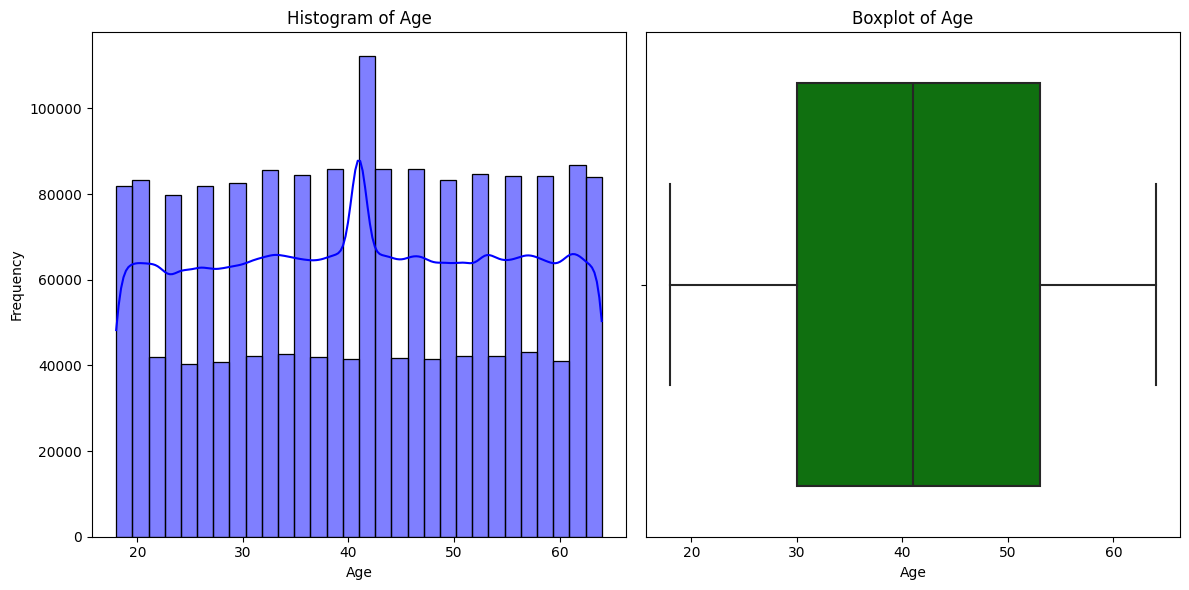

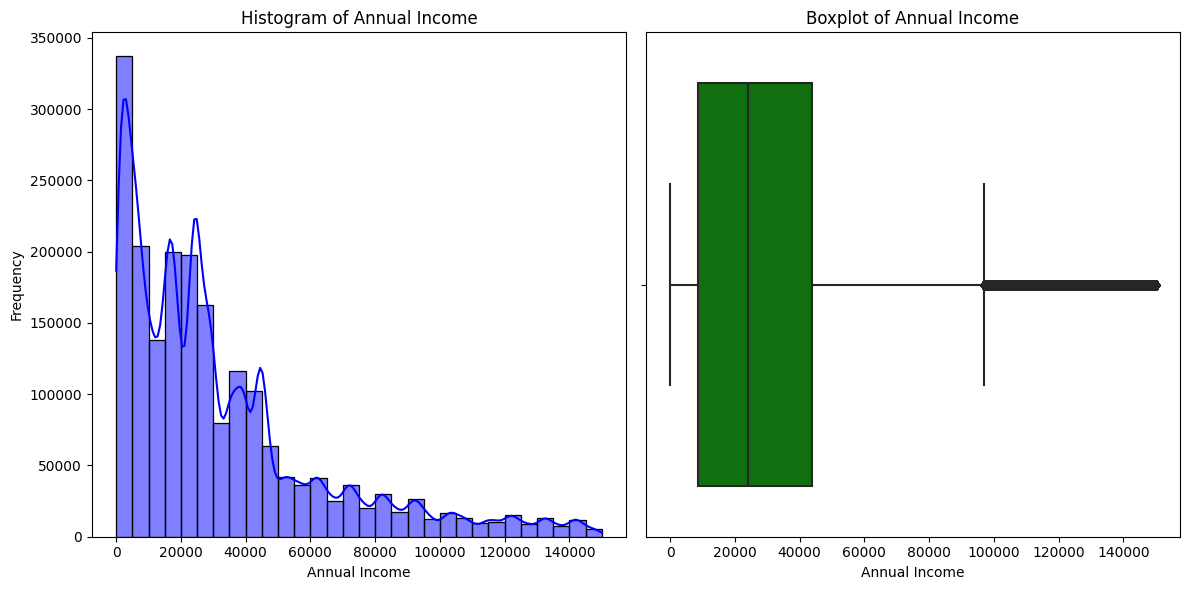

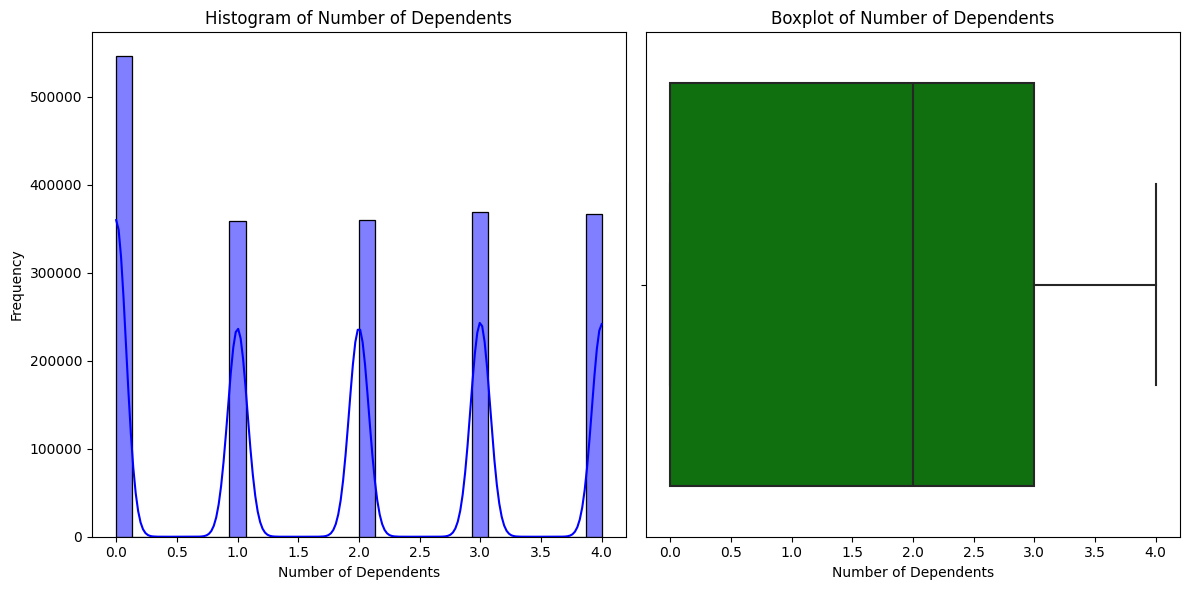

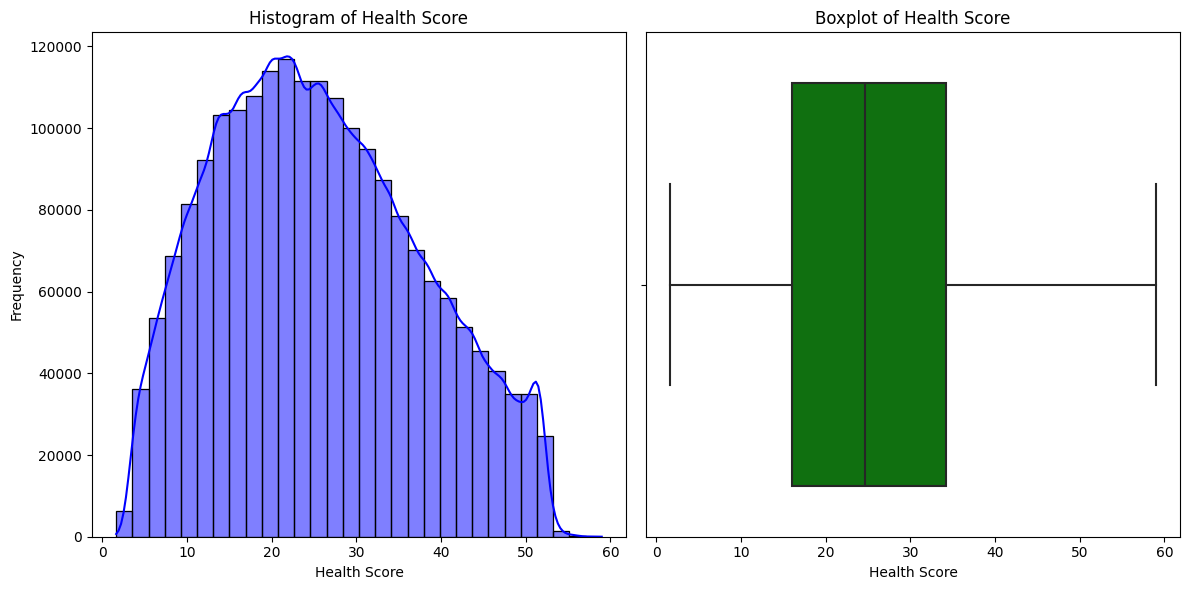

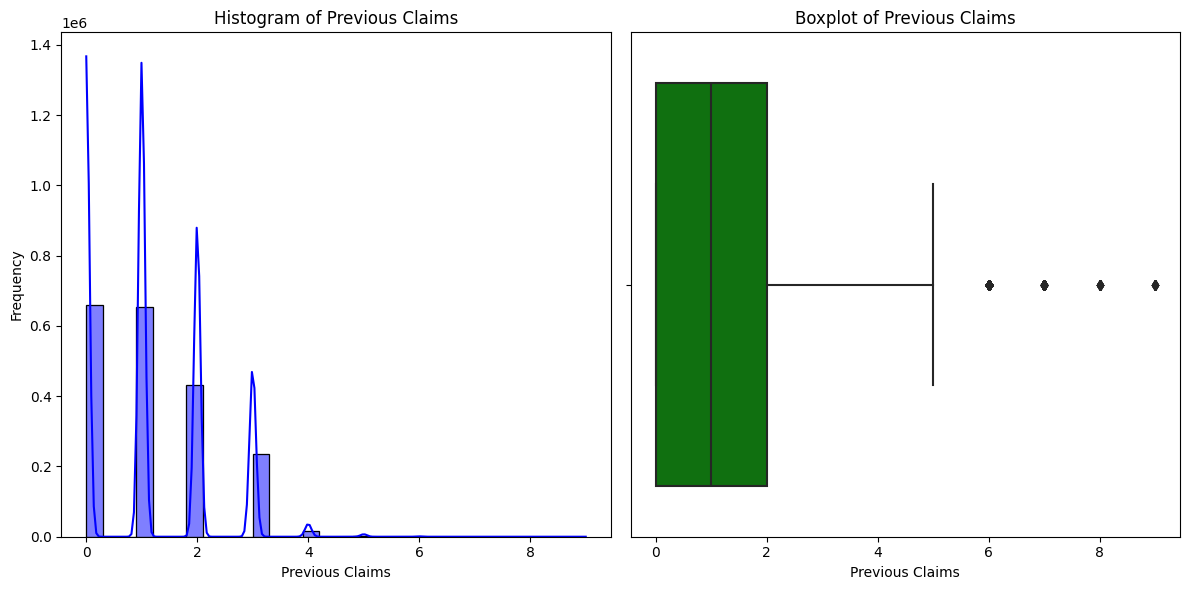

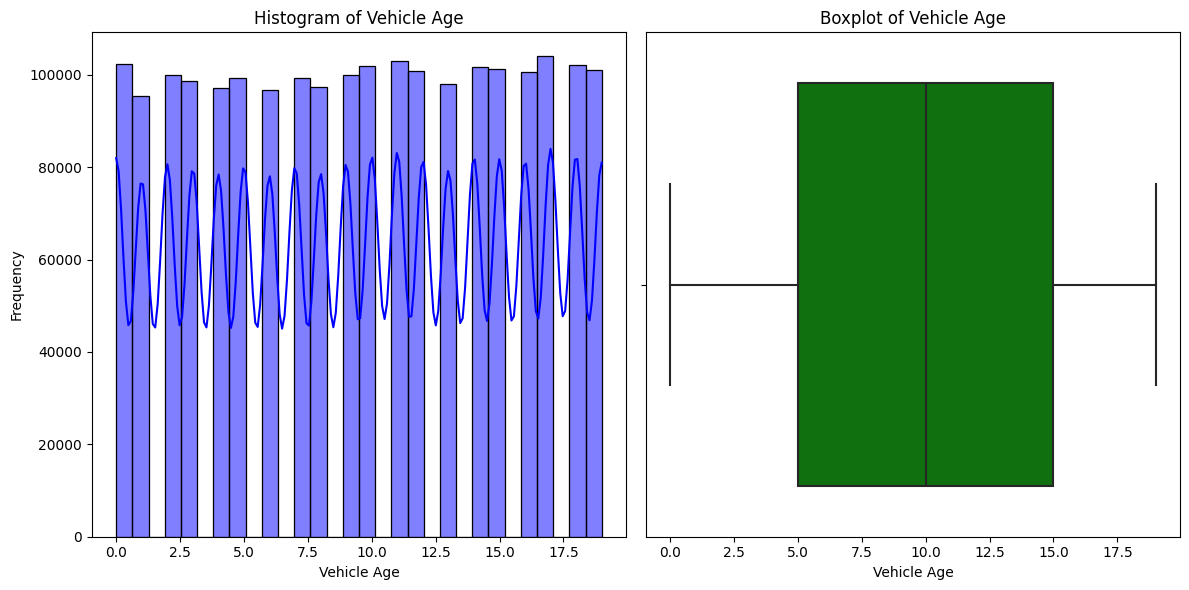

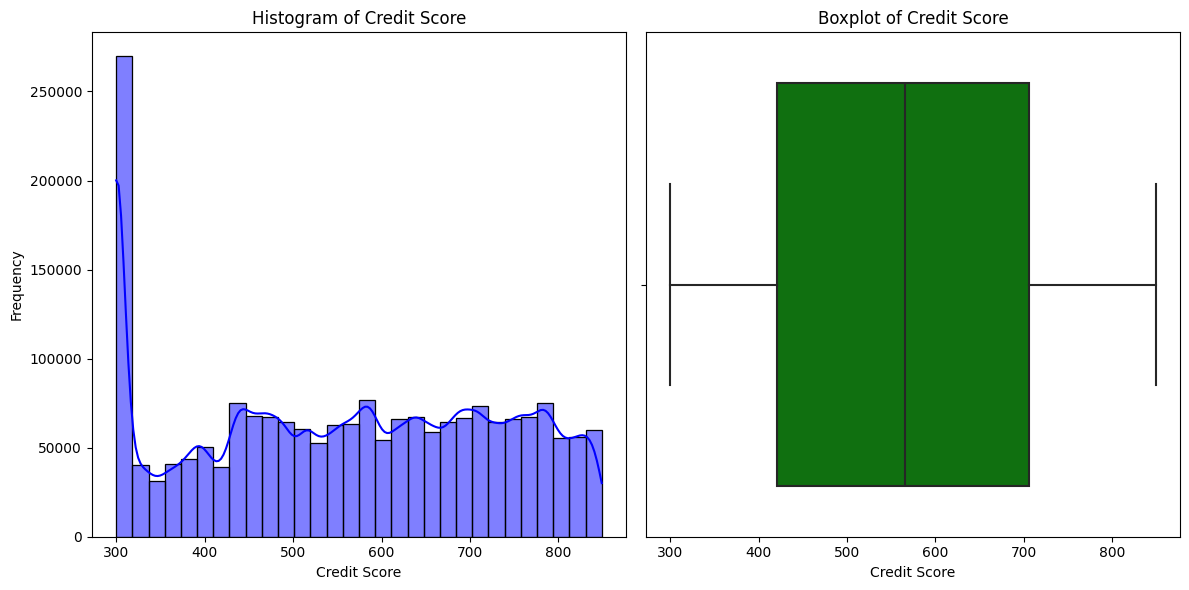

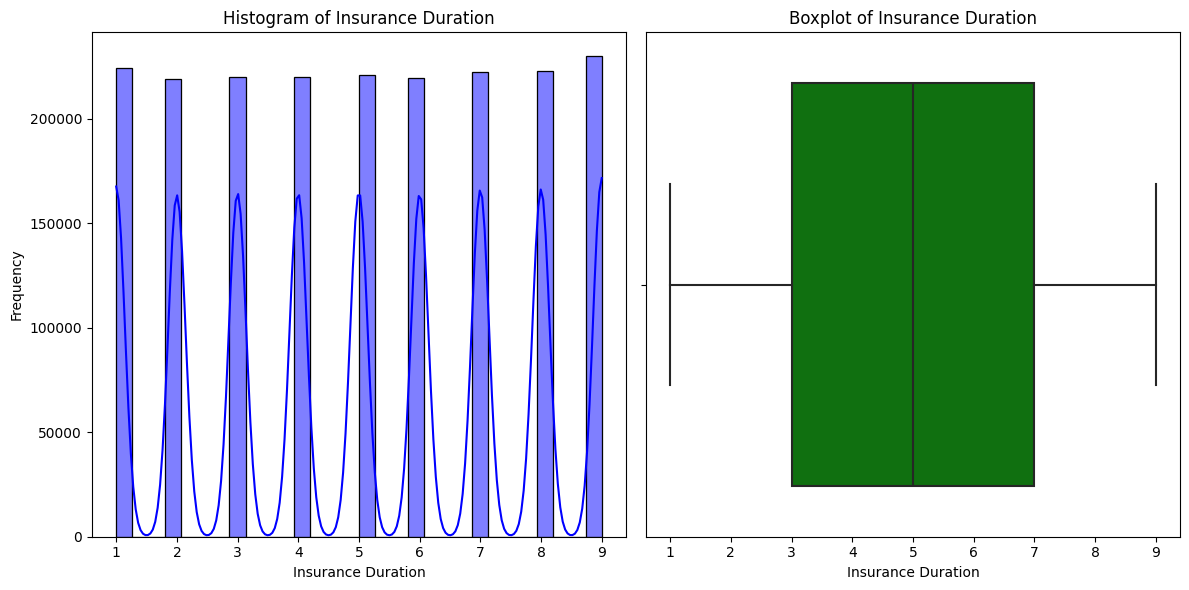

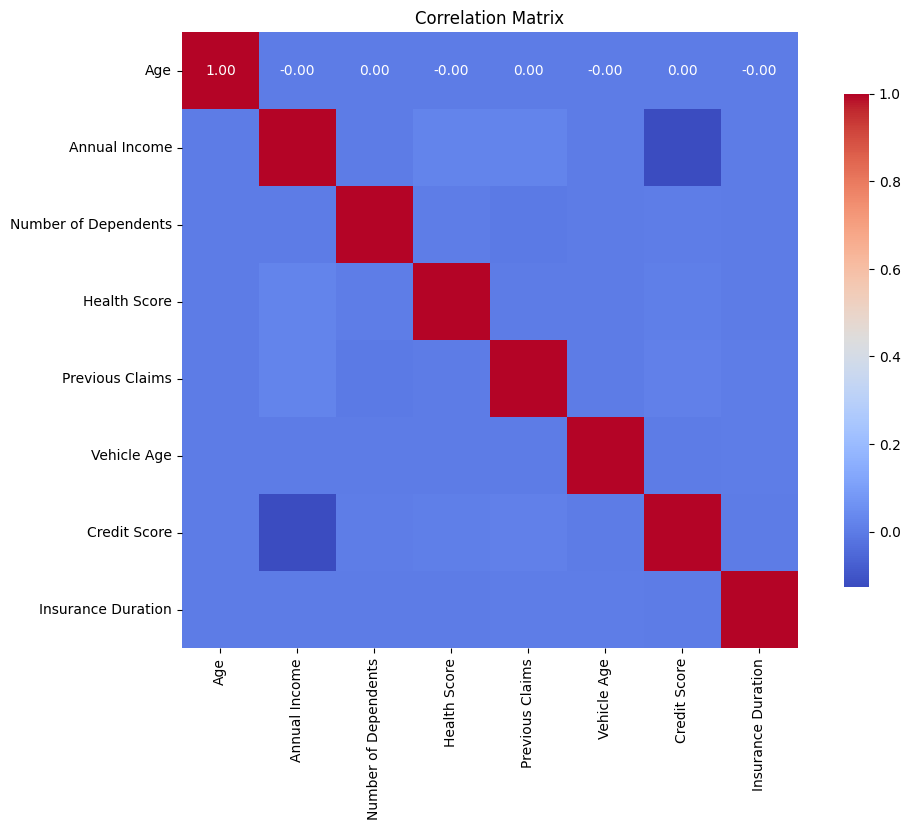

In [63]:
# showing the visuals 
visualize_data_distribution(num_data_1)